In [1]:
from hunt.tournament import Tournament
from hunt.game import DesignGame, Player
from hunt.player import RandomPlayer, MirrorPlayer

t = Tournament(
    players = [Player, RandomPlayer, MirrorPlayer],
    games = [
        DesignGame([[[2,3],[0,4]]]),
        
        DesignGame([
            [[0,0],[0,4]],
            [[1,1],[1.5,3.5]],
            [[1,1],[0,2]],
            [[2,3],[0,0]]
        ])
    ],
    num_reps=200
)
print(t.run())

{'null': 1.0783333333333331, 'random': 1.4643749999999995, 'mirror': 1.5295833333333322}


In [2]:
from hunt.tournament import Tournament
from hunt.game import DesignGame, Player
from hunt.player import RandomPlayer, MirrorPlayer

from players_new import RiskAwareRDplayer_averse1, RiskAwareRDplayer_averse2
from players_new import RiskAwareRDplayer_seeker1, RiskAwareRDplayer_seeker2

from players_new import RiskAwareRDplayer_neutral


from players_new import RiskAwareEUplayer_averse1, RiskAwareEUplayer_averse2
from players_new import RiskAwareEUplayer_seeker1, RiskAwareEUplayer_seeker2
from players_new import RiskAwareEUplayer_neutral

import pandas as pd

data = pd.read_csv("bi_level_payoffs.csv")

bi_level_games = data.apply(
    lambda r: DesignGame([
        [[r.payoff1, r.payoff1], [r.payoff_A, r.A]],
        [[r.payoff1, r.payoff1], [r.payoff_B, r.B]],
        [[r.payoff1, r.payoff1], [r.payoff_C, r.C]]
    ]), 
    axis=1
)

t_RD = Tournament(
    players = [RiskAwareRDplayer_neutral,
               RiskAwareRDplayer_averse1,  RiskAwareRDplayer_averse2, 
               RiskAwareRDplayer_seeker1, RiskAwareRDplayer_seeker2],
    games = bi_level_games,
    num_reps=1
)

t_EU = Tournament(
    players = [RiskAwareEUplayer_neutral,
              RiskAwareEUplayer_averse1, RiskAwareEUplayer_averse2,
              RiskAwareEUplayer_seeker1, RiskAwareEUplayer_seeker2],
    games = bi_level_games,
    num_reps=1
)

t_EU_RD = Tournament(
    players = [RiskAwareEUplayer_neutral, RiskAwareRDplayer_neutral],
    games = bi_level_games,
    num_reps=1
)

print(t_RD.run())
print(t_EU.run())
print(t_EU_RD.run())

{'RD_neutral': 60.296551724137956, 'RD_averse1': 57.04827586206899, 'RD_averse2': 54.13793103448278, 'RD_seeker1': 31.000000000000018, 'RD_seeker2': 31.000000000000018}
{'EU_neutral': 60.5034482758621, 'EU_averse1': 52.4137931034483, 'EU_averse2': 53.60000000000002, 'EU_seeker1': 32.24137931034485, 'EU_seeker2': 32.24137931034484}
{'EU_neutral': 64.48275862068968, 'RD_neutral': 64.48275862068968}


In [3]:
t_RD = Tournament(
    players = [RiskAwareRDplayer_neutral,
               RiskAwareRDplayer_averse1,  RiskAwareRDplayer_averse2, 
               RiskAwareRDplayer_seeker1, RiskAwareRDplayer_seeker2],
    games = bi_level_games,
    num_reps=1
)

print(t_RD.run())

import csv
with open('BL_results.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow([
        "game", 
        "rep", 
        "player_1_name", 
        "player_1_design", 
        "player_1_strategy", 
        "player_1_payoff", 
        "player_2_name", 
        "player_2_design", 
        "player_2_strategy",
        "player_2_payoff"
    ])
    for row in t_RD.rep_results:
        spamwriter.writerow([
            row["game"], 
            row["rep"], 
            row["player_1"]["name"], 
            row["player_1"]["design"], 
            row["player_1"]["strategy"],
            row["player_1"]["payoff"],
            row["player_2"]["name"], 
            row["player_2"]["design"], 
            row["player_2"]["strategy"],
            row["player_2"]["payoff"],
        ])

{'RD_neutral': 60.296551724137956, 'RD_averse1': 57.04827586206899, 'RD_averse2': 54.13793103448278, 'RD_seeker1': 31.000000000000018, 'RD_seeker2': 31.000000000000018}


In [4]:
import pandas as pd

#1--for risk_neutral versus risk_neutral:
  
df=pd.read_csv(r"BL_results.csv")

#1--for risk_neutral versus risk_neutral:

NN_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NN_CC = (NN_CC_df['player_1_strategy']==1).sum()
print('NN_CC=', NN_CC)

NN_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NN_CD = (NN_CD_df['player_1_strategy']==1).sum()
print('NN_CD=', NN_CD)

NN_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NN_DD = (NN_DD_df['player_1_strategy']==0).sum()
print('NN_DD=', NN_DD)

NN_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NN_DC = (NN_DC_df['player_1_strategy']==0).sum()
print('NN_DC=', NN_DC)

NN_CC_per = "{:.2f}".format((NN_CC*100)/29)
print("NN_CC_per=", NN_CC_per, '%')
NN_CD_per = "{:.2f}".format((NN_CD*100)/29)
print("NN_CD_per=", NN_CD_per, '%')
NN_DD_per = "{:.2f}".format((NN_DD*100)/29)
print("NN_DD_per=", NN_DD_per, '%')
NN_DC_per = "{:.2f}".format((NN_DC*100)/29)
print("NN_DC_per=", NN_DC_per, '%')
print("")

#2--for risk_neutral versus risk_averse1:

NA1_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NA1_CC = (NA1_CC_df['player_1_strategy']==1).sum()
print('NA1_CC=', NA1_CC)

NA1_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NA1_CD = (NA1_CD_df['player_1_strategy']==1).sum()
print('NA1_CD=', NA1_CD)

NA1_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NA1_DD = (NA1_DD_df['player_1_strategy']==0).sum()
print('NA1_DD=', NA1_DD)

NA1_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NA1_DC = (NA1_DC_df['player_1_strategy']==0).sum()
print('NA1_DC=', NA1_DC)

NA1_CC_per = "{:.2f}".format((NA1_CC*100)/29)
print("NA1_CC_per=", NA1_CC_per, '%')
NA1_CD_per = "{:.2f}".format((NA1_CD*100)/29)
print("NA1_CD_per=", NA1_CD_per, '%')
NA1_DD_per = "{:.2f}".format((NA1_DD*100)/29)
print("NA1_DD_per=", NA1_DD_per, '%')
NA1_DC_per = "{:.2f}".format((NA1_DC*100)/29)
print("NA1_DC_per=", NA1_DC_per, '%')
print("")

#3--for risk_neutral versus risk_averse2:

NA2_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NA2_CC = (NA2_CC_df['player_1_strategy']==1).sum()
print('NA2_CC=', NA2_CC)

NA2_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NA2_CD = (NA2_CD_df['player_1_strategy']==1).sum()
print('NA2_CD=', NA2_CD)

NA2_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NA2_DD = (NA2_DD_df['player_1_strategy']==0).sum()
print('NA2_DD=', NA2_DD)

NA2_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NA2_DC = (NA2_DC_df['player_1_strategy']==0).sum()
print('NA2_DC=', NA2_DC)

NA2_CC_per = "{:.2f}".format((NA2_CC*100)/29)
print("NA2_CC_per=", NA2_CC_per, '%')
NA2_CD_per = "{:.2f}".format((NA2_CD*100)/29)
print("NA2_CD_per=", NA2_CD_per, '%')
NA2_DD_per = "{:.2f}".format((NA2_DD*100)/29)
print("NA2_DD_per=", NA2_DD_per, '%')
NA2_DC_per = "{:.2f}".format((NA2_DC*100)/29)
print("NA2_DC_per=", NA2_DC_per, '%')
print("")

#4--for risk_neutral versus risk_seeker1:

NS1_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NS1_CC = (NS1_CC_df['player_1_strategy']==1).sum()
print('NS1_CC=', NS1_CC)

NS1_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NS1_CD = (NS1_CD_df['player_1_strategy']==1).sum()
print('NS1_CD=', NS1_CD)

NS1_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NS1_DD = (NS1_DD_df['player_1_strategy']==0).sum()
print('NS1_DD=', NS1_DD)

NS1_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NS1_DC = (NS1_DC_df['player_1_strategy']==0).sum()
print('NS1_DC=', NS1_DC)

NS1_CC_per = "{:.2f}".format((NS1_CC*100)/29)
print("NS1_CC_per=", NS1_CC_per, '%')
NS1_CD_per = "{:.2f}".format((NS1_CD*100)/29)
print("NS1_CD_per=", NS1_CD_per, '%')
NS1_DD_per = "{:.2f}".format((NS1_DD*100)/29)
print("NS1_DD_per=", NS1_DD_per, '%')
NS1_DC_per = "{:.2f}".format((NS1_DC*100)/29)
print("NS1_DC_per=", NS1_DC_per, '%')
print("")

#5--for risk_neutral versus risk_seeker2:

NS2_CC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
NS2_CC = (NS2_CC_df['player_1_strategy']==1).sum()
print('NS2_CC=', NS2_CC)

NS2_CD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
NS2_CD = (NS2_CD_df['player_1_strategy']==1).sum()
print('NS2_CD=', NS2_CD)

NS2_DD_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
NS2_DD = (NS2_DD_df['player_1_strategy']==0).sum()
print('NS2_DD=', NS2_DD)

NS2_DC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
NS2_DC = (NS2_DC_df['player_1_strategy']==0).sum()
print('NS2_DC=', NS2_DC)

NS2_CC_per = "{:.2f}".format((NS2_CC*100)/29)
print("NS2_CC_per=", NS2_CC_per, '%')
NS2_CD_per = "{:.2f}".format((NS2_CD*100)/29)
print("NS2_CD_per=", NS2_CD_per, '%')
NS2_DD_per = "{:.2f}".format((NS2_DD*100)/29)
print("NS2_DD_per=", NS2_DD_per, '%')
NS2_DC_per = "{:.2f}".format((NS2_DC*100)/29)
print("NS2_DC_per=", NS2_DC_per, '%')
print("")

#6--for risk_averse1 versus risk_averse1:

A1A1_CC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A1A1_CC = (A1A1_CC_df['player_1_strategy']==1).sum()
print('A1A1_CC=', A1A1_CC)

A1A1_CD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A1A1_CD = (A1A1_CD_df['player_1_strategy']==1).sum()
print('A1A1_CD=', A1A1_CD)

A1A1_DD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A1A1_DD = (A1A1_DD_df['player_1_strategy']==0).sum()
print('A1A1_DD=', A1A1_DD)

A1A1_DC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A1A1_DC = (A1A1_DC_df['player_1_strategy']==0).sum()
print('A1A1_DC=', A1A1_DC)

A1A1_CC_per = "{:.2f}".format((A1A1_CC*100)/29)
print("A1A1_CC_per=", A1A1_CC_per, '%')
A1A1_CD_per = "{:.2f}".format((A1A1_CD*100)/29)
print("A1A1_CD_per=", A1A1_CD_per, '%')
A1A1_DD_per = "{:.2f}".format((A1A1_DD*100)/29)
print("A1A1_DD_per=", A1A1_DD_per, '%')
A1A1_DC_per = "{:.2f}".format((A1A1_DC*100)/29)
print("A1A1_DC_per=", A1A1_DC_per, '%')
print("")

#7--for risk_averse1 versus risk_averse2:

A1A2_CC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A1A2_CC = (A1A1_CC_df['player_1_strategy']==1).sum()
print('A1A2_CC=', A1A2_CC)

A1A2_CD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A1A2_CD = (A1A2_CD_df['player_1_strategy']==1).sum()
print('A1A2_CD=', A1A2_CD)

A1A2_DD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A1A2_DD = (A1A2_DD_df['player_1_strategy']==0).sum()
print('A1A2_DD=', A1A2_DD)

A1A2_DC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A1A2_DC = (A1A2_DC_df['player_1_strategy']==0).sum()
print('A1A2_DC=', A1A2_DC)

A1A2_CC_per = "{:.2f}".format((A1A2_CC*100)/29)
print("A1A2_CC_per=", A1A2_CC_per, '%')
A1A2_CD_per = "{:.2f}".format((A1A2_CD*100)/29)
print("A1A2_CD_per=", A1A2_CD_per, '%')
A1A2_DD_per = "{:.2f}".format((A1A2_DD*100)/29)
print("A1A2_DD_per=", A1A2_DD_per, '%')
A1A2_DC_per = "{:.2f}".format((A1A2_DC*100)/29)
print("A1A2_DC_per=", A1A2_DC_per, '%')
print("")

#8--for risk_averse1 versus risk_seeker1:

A1S1_CC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A1S1_CC = (A1S1_CC_df['player_1_strategy']==1).sum()
print('A1S1_CC=', A1S1_CC)

A1S1_CD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A1S1_CD = (A1S1_CD_df['player_1_strategy']==1).sum()
print('A1S1_CD=', A1S1_CD)

A1S1_DD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A1S1_DD = (A1S1_DD_df['player_1_strategy']==0).sum()
print('A1S1_DD=', A1S1_DD)

A1S1_DC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A1S1_DC = (A1S1_DC_df['player_1_strategy']==0).sum()
print('A1S1_DC=', A1S1_DC)

A1S1_CC_per = "{:.2f}".format((A1S1_CC*100)/29)
print("A1S1_CC_per=", A1S1_CC_per, '%')
A1S1_CD_per = "{:.2f}".format((A1S1_CD*100)/29)
print("A1S1_CD_per=", A1S1_CD_per, '%')
A1S1_DD_per = "{:.2f}".format((A1S1_DD*100)/29)
print("A1S1_DD_per=", A1S1_DD_per, '%')
A1S1_DC_per = "{:.2f}".format((A1S1_DC*100)/29)
print("A1S1_DC_per=", A1S1_DC_per, '%')
print("")

#9--for risk_averse1 versus risk_seeker2:

A1S2_CC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A1S2_CC = (A1S2_CC_df['player_1_strategy']==1).sum()
print('A1S2_CC=', A1S2_CC)

A1S2_CD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A1S2_CD = (A1S2_CD_df['player_1_strategy']==1).sum()
print('A1S2_CD=', A1S2_CD)

A1S2_DD_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A1S2_DD = (A1S1_DD_df['player_1_strategy']==0).sum()
print('A1S2_DD=', A1S2_DD)

A1S2_DC_df = df[((df['player_1_name'] == 'RD_averse1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A1S2_DC = (A1S2_DC_df['player_1_strategy']==0).sum()
print('A1S2_DC=', A1S2_DC)

A1S2_CC_per = "{:.2f}".format((A1S2_CC*100)/29)
print("A1S2_CC_per=", A1S2_CC_per, '%')
A1S2_CD_per = "{:.2f}".format((A1S2_CD*100)/29)
print("A1S2_CD_per=", A1S2_CD_per, '%')
A1S2_DD_per = "{:.2f}".format((A1S2_DD*100)/29)
print("A1S2_DD_per=", A1S2_DD_per, '%')
A1S2_DC_per = "{:.2f}".format((A1S2_DC*100)/29)
print("A1S2_DC_per=", A1S2_DC_per, '%')
print("")

#10--for risk_averse2 versus risk_averse2:

A2A2_CC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A2A2_CC = (A2A2_CC_df['player_1_strategy']==1).sum()
print('A2A2_CC=', A2A2_CC)

A2A2_CD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A2A2_CD = (A2A2_CD_df['player_1_strategy']==1).sum()
print('A2A2_CD=', A2A2_CD)

A2A2_DD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A2A2_DD = (A2A2_DD_df['player_1_strategy']==0).sum()
print('A2A2_DD=', A2A2_DD)

A2A2_DC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_averse2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A2A2_DC = (A2A2_DC_df['player_1_strategy']==0).sum()
print('A2A2_DC=', A2A2_DC)

A2A2_CC_per = "{:.2f}".format((A2A2_CC*100)/29)
print("A2A2_CC_per=", A2A2_CC_per, '%')
A2A2_CD_per = "{:.2f}".format((A2A2_CD*100)/29)
print("A2A2_CD_per=", A2A2_CD_per, '%')
A2A2_DD_per = "{:.2f}".format((A2A2_DD*100)/29)
print("A2A2_DD_per=", A2A2_DD_per, '%')
A2A2_DC_per = "{:.2f}".format((A2A2_DC*100)/29)
print("A2A2_DC_per=", A2A2_DC_per, '%')
print("")

#11--for risk_averse2 versus risk_seeker1:

A2S1_CC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A2S1_CC = (A2S1_CC_df['player_1_strategy']==1).sum()
print('A2S1_CC=', A2S1_CC)

A2S1_CD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A2S1_CD = (A2S1_CD_df['player_1_strategy']==1).sum()
print('A2S1_CD=', A2S1_CD)

A2S1_DD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A2S1_DD = (A2S1_DD_df['player_1_strategy']==0).sum()
print('A2S1_DD=', A2S1_DD)

A2S1_DC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A2S1_DC = (A2S1_DC_df['player_1_strategy']==0).sum()
print('A2S1_DC=', A2S1_DC)

A2S1_CC_per = "{:.2f}".format((A2S1_CC*100)/29)
print("A2S1_CC_per=", A2S1_CC_per, '%')
A2S1_CD_per = "{:.2f}".format((A2S1_CD*100)/29)
print("A2S1_CD_per=", A2S1_CD_per, '%')
A2S1_DD_per = "{:.2f}".format((A2S1_DD*100)/29)
print("A2S1_DD_per=", A2S1_DD_per, '%')
A2S1_DC_per = "{:.2f}".format((A2S1_DC*100)/29)
print("A2S1_DC_per=", A2S1_DC_per, '%')
print("")

#12--for risk_averse2 versus risk_seeker2:

A2S2_CC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
A2S2_CC = (A2S2_CC_df['player_1_strategy']==1).sum()
print('A2S2_CC=', A2S2_CC)

A2S2_CD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
A2S2_CD = (A2S2_CD_df['player_1_strategy']==1).sum()
print('A2S2_CD=', A2S2_CD)

A2S2_DD_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
A2S2_DD = (A2S2_DD_df['player_1_strategy']==0).sum()
print('A2S2_DD=', A2S2_DD)

A2S2_DC_df = df[((df['player_1_name'] == 'RD_averse2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
A2S2_DC = (A2S2_DC_df['player_1_strategy']==0).sum()
print('A2S2_DC=', A2S2_DC)

A2S2_CC_per = "{:.2f}".format((A2S2_CC*100)/29)
print("A2S2_CC_per=", A2S2_CC_per, '%')
A2S2_CD_per = "{:.2f}".format((A2S2_CD*100)/29)
print("A2S2_CD_per=", A2S2_CD_per, '%')
A2S2_DD_per = "{:.2f}".format((A2S2_DD*100)/29)
print("A2S2_DD_per=", A2S2_DD_per, '%')
A2S2_DC_per = "{:.2f}".format((A2S2_DC*100)/29)
print("A2S2_DC_per=", A2S2_DC_per, '%')
print("")

#13--for risk_seeker1 versus risk_seeker1:

S1S1_CC_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
S1S1_CC = (S1S1_CC_df['player_1_strategy']==1).sum()
print('S1S1_CC=', S1S1_CC)

S1S1_CD_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
S1S1_CD = (S1S1_CD_df['player_1_strategy']==1).sum()
print('S1S1_CD=', S1S1_CD)

S1S1_DD_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
S1S1_DD = (S1S1_DD_df['player_1_strategy']==0).sum()
print('S1S1_DD=', S1S1_DD)

S1S1_DC_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker1')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
S1S1_DC = (S1S1_DC_df['player_1_strategy']==0).sum()
print('S1S1_DC=', S1S1_DC)

S1S1_CC_per = "{:.2f}".format((S1S1_CC*100)/29)
print("S1S1_CC_per=", S1S1_CC_per, '%')
S1S1_CD_per = "{:.2f}".format((S1S1_CD*100)/29)
print("S1S1_CD_per=", S1S1_CD_per, '%')
S1S1_DD_per = "{:.2f}".format((S1S1_DD*100)/29)
print("S1S1_DD_per=", S1S1_DD_per, '%')
S1S1_DC_per = "{:.2f}".format((S1S1_DC*100)/29)
print("S1S1_DC_per=", S1S1_DC_per, '%')
print("")

#14--for risk_seeker1 versus risk_seeker2:

S1S2_CC_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
S1S2_CC = (S1S2_CC_df['player_1_strategy']==1).sum()
print('S1S2_CC=', S1S2_CC)

S1S2_CD_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
S1S2_CD = (S1S2_CD_df['player_1_strategy']==1).sum()
print('S1S2_CD=', S1S2_CD)

S1S2_DD_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
S1S2_DD = (S1S2_DD_df['player_1_strategy']==0).sum()
print('S1S2_DD=', S1S2_DD)

S1S2_DC_df = df[((df['player_1_name'] == 'RD_seeker1') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
S1S2_DC = (S1S2_DC_df['player_1_strategy']==0).sum()
print('S1S2_DC=', S1S2_DC)

S1S2_CC_per = "{:.2f}".format((S1S2_CC*100)/29)
print("S1S2_CC_per=", S1S2_CC_per, '%')
S1S2_CD_per = "{:.2f}".format((S1S2_CD*100)/29)
print("S1S2_CD_per=", S1S2_CD_per, '%')
S1S2_DD_per = "{:.2f}".format((S1S2_DD*100)/29)
print("S1S2_DD_per=", S1S2_DD_per, '%')
S1S2_DC_per = "{:.2f}".format((S1S2_DC*100)/29)
print("S1S2_DC_per=", S1S2_DC_per, '%')
print("")

#15--for risk_seeker2 versus risk_seeker2:

S2S2_CC_df = df[((df['player_1_name'] == 'RD_seeker2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==1))]
S2S2_CC = (S2S2_CC_df['player_1_strategy']==1).sum()
print('S2S2_CC=', S2S2_CC)

S2S2_CD_df = df[((df['player_1_name'] == 'RD_seeker2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==1) & (df['player_2_strategy']==0))]
S2S2_CD = (S2S2_CD_df['player_1_strategy']==1).sum()
print('S2S2_CD=', S2S2_CD)

S2S2_DD_df = df[((df['player_1_name'] == 'RD_seeker2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==0))]
S2S2_DD = (S2S2_DD_df['player_1_strategy']==0).sum()
print('S2S2_DD=', S2S2_DD)

S2S2_DC_df = df[((df['player_1_name'] == 'RD_seeker2') & (df['player_2_name'] == 'RD_seeker2')) & ((df['player_1_strategy']==0) & (df['player_2_strategy']==1))]
S2S2_DC = (S2S2_DC_df['player_1_strategy']==0).sum()
print('S2S2_DC=', S2S2_DC)

S2S2_CC_per = "{:.2f}".format((S2S2_CC*100)/29)
print("S2S2_CC_per=", S2S2_CC_per, '%')
S2S2_CD_per = "{:.2f}".format((S2S2_CD*100)/29)
print("S2S2_CD_per=", S2S2_CD_per, '%')
S2S2_DD_per = "{:.2f}".format((S2S2_DD*100)/29)
print("S2S2_DD_per=", S2S2_DD_per, '%')
S2S2_DC_per = "{:.2f}".format((S2S2_DC*100)/29)
print("S2S2_DC_per=", S2S2_DC_per, '%')
print("")

NN_CC= 14
NN_CD= 0
NN_DD= 15
NN_DC= 0
NN_CC_per= 48.28 %
NN_CD_per= 0.00 %
NN_DD_per= 51.72 %
NN_DC_per= 0.00 %

NA1_CC= 9
NA1_CD= 5
NA1_DD= 15
NA1_DC= 0
NA1_CC_per= 31.03 %
NA1_CD_per= 17.24 %
NA1_DD_per= 51.72 %
NA1_DC_per= 0.00 %

NA2_CC= 7
NA2_CD= 7
NA2_DD= 15
NA2_DC= 0
NA2_CC_per= 24.14 %
NA2_CD_per= 24.14 %
NA2_DD_per= 51.72 %
NA2_DC_per= 0.00 %

NS1_CC= 14
NS1_CD= 0
NS1_DD= 0
NS1_DC= 15
NS1_CC_per= 48.28 %
NS1_CD_per= 0.00 %
NS1_DD_per= 0.00 %
NS1_DC_per= 51.72 %

NS2_CC= 14
NS2_CD= 0
NS2_DD= 0
NS2_DC= 15
NS2_CC_per= 48.28 %
NS2_CD_per= 0.00 %
NS2_DD_per= 0.00 %
NS2_DC_per= 51.72 %

A1A1_CC= 9
A1A1_CD= 2
A1A1_DD= 20
A1A1_DC= 0
A1A1_CC_per= 31.03 %
A1A1_CD_per= 6.90 %
A1A1_DD_per= 68.97 %
A1A1_DC_per= 0.00 %

A1A2_CC= 9
A1A2_CD= 2
A1A2_DD= 20
A1A2_DC= 0
A1A2_CC_per= 31.03 %
A1A2_CD_per= 6.90 %
A1A2_DD_per= 68.97 %
A1A2_DC_per= 0.00 %

A1S1_CC= 9
A1S1_CD= 0
A1S1_DD= 0
A1S1_DC= 20
A1S1_CC_per= 31.03 %
A1S1_CD_per= 0.00 %
A1S1_DD_per= 0.00 %
A1S1_DC_per= 68.97 %

A1S2_CC= 9
A1S2_CD=

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

matrix =np.array([
        [A2S2_DD_per, A2S2_CD_per, A1S2_DD_per, A1S2_CD_per, NS2_DD_per, NS2_CD_per, S1S2_DD_per, S1S2_CD_per, S2S2_DD_per, S2S2_DC_per],
        [A2S2_DC_per, A2S2_CC_per, A1S2_DC_per, A1S2_CC_per, NS2_DC_per, NS2_CC_per, S1S2_DC_per, S1S2_CC_per, S2S2_CD_per, S2S2_CC_per],
        [A2S1_DD_per, A2S1_CD_per, A1S1_DD_per, A1S1_CD_per, NS1_DD_per, NS1_CD_per, S1S1_DD_per, S1S1_DC_per, S1S2_DD_per, S1S2_DC_per],
        [A2S1_DC_per, A2S1_CC_per, A1S1_DC_per, A1S1_CC_per, NS1_DC_per, NS1_CC_per, S1S1_CD_per, S1S1_CC_per, S1S2_CD_per, S1S2_CC_per],
        [NA2_DD_per, NA2_DC_per, NA1_DD_per, NA1_DC_per, NN_DD_per, NN_DC_per, NS1_DD_per, NS1_DC_per, NS2_DD_per, NS2_DC_per],
        [NA2_CD_per, NA2_CC_per, NA1_CD_per, NA1_CC_per, NN_CD_per, NN_CC_per, NS1_CD_per, NS1_CC_per, NS2_CD_per, NS2_CC_per],
        [A1A2_DD_per, A2A2_CD_per, A1A1_DD_per, A1A1_CD_per, NA1_DD_per, NA1_CD_per, A1S1_DD_per, A1S1_DC_per, A1S2_DD_per, A1S2_DC_per],
        [A1A2_DC_per, A1A2_CC_per, A1A1_DC_per, A1A1_CC_per, NA1_DC_per, NA1_CC_per, A1S1_CD_per, A1S1_CC_per, A1S2_CD_per, A1S2_CC_per],
        [A2A2_DD_per, A2A2_CD_per, A1A2_DD_per, A1A2_CD_per, NA2_DD_per, NA2_CD_per, A2S1_DD_per, A2S1_DC_per, A2S2_DD_per, A2S2_DC_per],
        [A2A2_DC_per, A2A2_CC_per, A1A2_DC_per, A1A2_CC_per, NA2_DC_per, NA2_CC_per, A2S1_CD_per, A2S1_CC_per, A2S2_CD_per, A2S2_CC_per]
]).astype(float)

x_axis_names = ['A2-D','A2-C','A1-D','A1-C','N-D','N-C','S1-D','S1-C','S2-D','S2-C']
y_axis_names = ['S2-D','S2-C','S1-D','S1-C','N-D','N-C','A1-D','A1-C','A2-D','A2-C']

print(matrix)

[[  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [ 75.86  24.14  68.97  31.03  51.72  48.28   0.   100.     0.   100.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [ 75.86  24.14  68.97  31.03  51.72  48.28   0.   100.     0.   100.  ]
 [ 51.72   0.    51.72   0.    51.72   0.     0.    51.72   0.    51.72]
 [ 24.14  24.14  17.24  31.03   0.    48.28   0.    48.28   0.    48.28]
 [ 68.97   0.    68.97   6.9   51.72  17.24   0.    68.97   0.    68.97]
 [  0.    31.03   0.    31.03   0.    31.03   0.    31.03   0.    31.03]
 [ 75.86   0.    68.97   6.9   51.72  24.14   0.    75.86   0.    75.86]
 [  0.    24.14   0.    31.03   0.    24.14   0.    24.14   0.    24.14]]


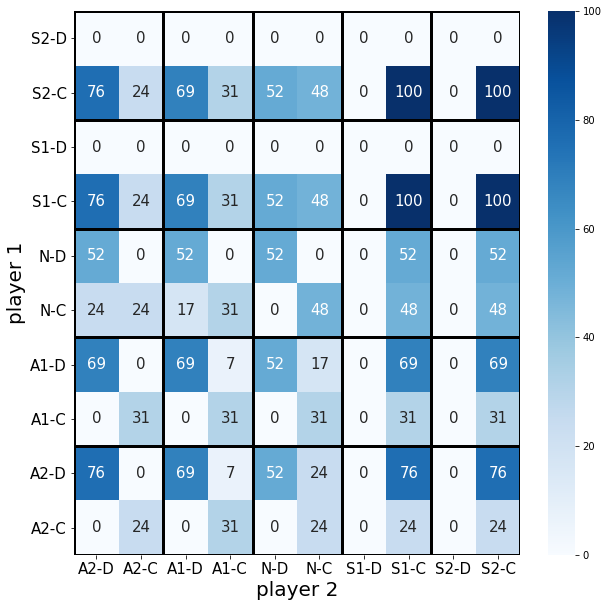

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle


filename_output = "bi_level_tournament_results.png"

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, annot_kws = {'size':15}, fmt=".0f", linewidths=0, ax=ax, cmap='Blues', robust=True)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(x_axis_names))+0.5)
ax.set_xticklabels(x_axis_names, fontsize = 15)
ax.set_xlabel('player 2', fontsize = 20) # X label

ax.tick_params(axis='y', rotation=90)

ax.set_yticks(np.arange(len(y_axis_names))+0.5)
ax.set_yticklabels(y_axis_names, fontsize = 15,  rotation=360, va='center_baseline')
ax.set_ylabel('player 1', fontsize = 20.0) # Y label
ax.add_patch(Rectangle((0,0), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,0), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,0), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,0), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,0), 2, 2, fill=False, edgecolor='black', lw=3))

ax.add_patch(Rectangle((0,2), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,2), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,2), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,2), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,2), 2, 2, fill=False, edgecolor='black', lw=3))

ax.add_patch(Rectangle((0,4), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,4), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,4), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,4), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,4), 2, 2, fill=False, edgecolor='black', lw=3))

ax.add_patch(Rectangle((0,6), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,6), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,6), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,6), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,6), 2, 2, fill=False, edgecolor='black', lw=3))

ax.add_patch(Rectangle((0,8), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((2,8), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((4,8), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((6,8), 2, 2, fill=False, edgecolor='black', lw=3))
ax.add_patch(Rectangle((8,8), 2, 2, fill=False, edgecolor='black', lw=3))

fig.savefig(filename_output, dpi = 100, bbox_inches = 'tight')  

In [7]:
import pandas as pd

df=pd.read_csv(r"BL_results.csv")

#1--for risk_seeker2 versus risk_averse2:

S2A2_dA_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==0))]
S2A2dA = (S2A2_dA_df['player_2_design']==0).sum()
#print('S2A2, S2A2_dA=', S2A2dA)
S2A2_dB_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==1))]
S2A2dB = (S2A2_dB_df['player_2_design']==1).sum()
#print('S2A2, S2A2_dB=', S2A2dB)
S2A2_dC_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==2))]
S2A2dC = (S2A2_dC_df['player_2_design']==2).sum()
#print('S2A2, S2A2_dC=', S2A2dC)

S2_dA_per = (S2A2dA*100)/29
print ("S2_dA_per= ", S2_dA_per)
S2_dB_per = (S2A2dB*100)/29
print ("S2_dB_per= ", S2_dB_per)
S2_dC_per = (S2A2dC*100)/29
print ("S2_dC_per= ", S2_dC_per)
print ('')

#6--for risk_seeker1 versus risk_averse2:

S1A2_dA_df = df[((df['player_2_name'] == 'RD_seeker1') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==0))]
S1A2dA = (S1A2_dA_df['player_2_design']==0).sum()
#print('S1A2, S1A2_dA=', S1A2dA)
S1A2_dB_df = df[((df['player_2_name'] == 'RD_seeker1') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==1))]
S1A2dB = (S1A2_dB_df['player_2_design']==1).sum()
#print('S1A2, S1A2_dB=', S1A2dB)
S1A2_dC_df = df[((df['player_2_name'] == 'RD_seeker1') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==2))]
S1A2dC = (S1A2_dC_df['player_2_design']==2).sum()
#print('S1A2, S1A2_dC=', S1A2dC)

S1_dA_per = (S2A2dA*100)/29
print ("S1_dA_per= ", S1_dA_per)
S1_dB_per = (S1A2dB*100)/29
print ("S1_dB_per= ", S1_dB_per)
S1_dC_per = (S1A2dC*100)/29
print ("S1_dC_per= ", S1_dC_per)
print ('')

#1--for risk_neutral versus risk_neutral:

NN_dA_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_design']==0))]
NNdA = (NN_dA_df['player_1_design']==0).sum()
#print('NN, N_dA=', NNdA)
NN_dB_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_design']==1))]
NNdB = (NN_dB_df['player_1_design']==1).sum()
#print('NN, N_dB=', NNdB)
NN_dC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_design']==2))]
NNdC = (NN_dC_df['player_1_design']==2).sum()
#print('NN, N_dC=', NNdC)

N_dA_per = (NNdA*100)/29
print ("N_dA_per= ", N_dA_per)
N_dB_per = (NNdB*100)/29
print ("N_dB_per= ", N_dB_per)
N_dC_per = (NNdC*100)/29
print ("N_dC_per= ", N_dC_per)
print ("")

#1--for risk_seeker2 versus risk_averse2:

A2S2_dA_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_1_design']==0))]
A2S2dA = (A2S2_dA_df['player_1_design']==0).sum()
#print('A2S2, A2S2_dA=', A2S2dA)
A2S2_dB_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_1_design']==1))]
A2S2dB = (A2S2_dB_df['player_1_design']==1).sum()
#print('A2S2, A2S2_dB=',A2S2dB)
A2S2_dC_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_1_design']==2))]
A2S2dC = (A2S2_dC_df['player_1_design']==2).sum()
#print('A2S2, A2S2_dC=', A2S2dC)

A2_dA_per = (A2S2dA*100)/29
print ("A2_dA_per= ", A2_dA_per)
A2_dB_per = (A2S2dB*100)/29
print ("A2_dB_per= ", A2_dB_per)
A2_dC_per = (A2S2dC*100)/29
print ("A2_dC_per= ", A2_dC_per)
print ('')

#1--for risk_seeker2 versus risk_averse2:

A1S2_dA_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse1')) & ((df['player_1_design']==0))]
A1S2dA = (A1S2_dA_df['player_1_design']==0).sum()
#print('A1S2, A1S2_dA=', A1S2dA)
A1S2_dB_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse1')) & ((df['player_1_design']==1))]
A1S2dB = (A1S2_dB_df['player_1_design']==1).sum()
#print('A1S2, A1S2_dB=',A1S2dB)
A1S2_dC_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse1')) & ((df['player_1_design']==2))]
A1S2dC = (A1S2_dC_df['player_1_design']==2).sum()
#print('A1S2, A1S2_dC=', A1S2dC)

A1_dA_per = (A1S2dA*100)/29
print ("A1_dA_per= ", A2_dA_per)
A1_dB_per = (A1S2dB*100)/29
print ("A1_dB_per= ", A1_dB_per)
A1_dC_per = (A1S2dC*100)/29
print ("A1_dC_per= ", A1_dC_per)
print ('')

S2_dA_per=  0.0
S2_dB_per=  0.0
S2_dC_per=  100.0

S1_dA_per=  0.0
S1_dB_per=  0.0
S1_dC_per=  100.0

N_dA_per=  51.724137931034484
N_dB_per=  0.0
N_dC_per=  48.275862068965516

A2_dA_per=  86.20689655172414
A2_dB_per=  10.344827586206897
A2_dC_per=  3.4482758620689653

A1_dA_per=  86.20689655172414
A1_dB_per=  6.896551724137931
A1_dC_per=  17.24137931034483



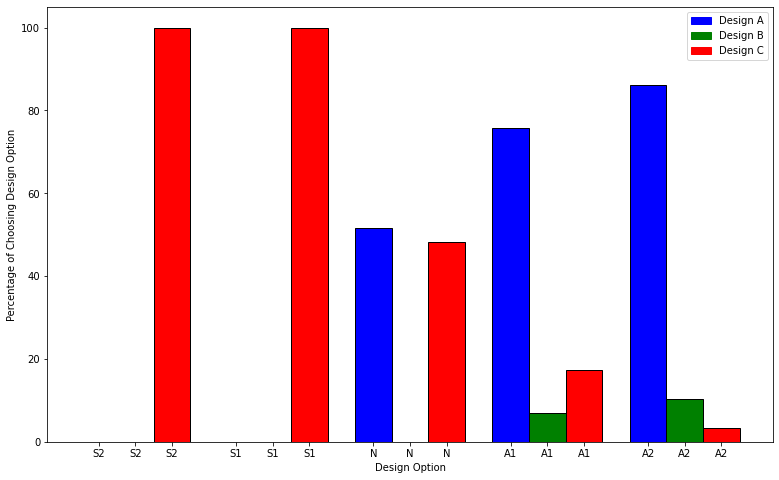

In [30]:
fig = plt.figure(figsize=(13,8))
gap_distance = [1,1.8,2.6, 4,4.8, 5.6, 7, 7.8, 8.6, 10,10.8,11.6, 13,13.8,14.6]
design_list = ['S2', 'S2', 'S2', 
               'S1', 'S1', 'S1',
               'N', 'N', 'N',
               'A1', 'A1', 'A1',
               'A2', 'A2', 'A2']

#when actor B is at x
choice_list_x = [S2_dA_per, S2_dB_per, S2_dC_per,
                 S1_dA_per, S1_dB_per, S1_dC_per,
                 N_dA_per, N_dB_per, N_dC_per,
                 A1_dA_per, A1_dB_per, A1_dC_per,
                 A2_dA_per, A2_dB_per, A2_dC_per]

plt.bar(gap_distance, choice_list_x, color=['blue', 'green', 'red', 'blue', 'green', 'red',
                                           'blue', 'green', 'red','blue', 'green', 'red','blue', 'green', 'red'], 
        edgecolor="black")
plt.xticks(gap_distance, design_list)
plt.xlabel("Design Option")
plt.ylabel("Percentage of Choosing Design Option")
colors = {'Design A':'blue', 'Design B':'green', 'Design C':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, fancybox=True)

plt.show()


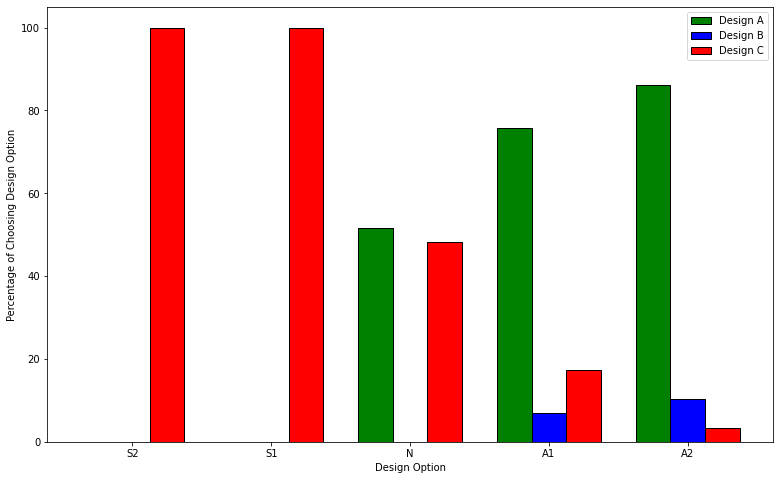

In [31]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,8))
# set width of bars
barWidth = 0.25
 
# set heights of bars
design_a = [S2_dA_per, S1_dA_per, N_dA_per, A1_dA_per, A2_dA_per]
design_b = [S2_dB_per, S1_dB_per, N_dB_per, A1_dB_per, A2_dB_per]
design_c = [S2_dC_per, S1_dC_per, N_dC_per, A1_dC_per, A2_dC_per]
 
# Set position of bar on X axis
r1 = np.arange(len(design_a))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, design_a, color='green', width=barWidth, edgecolor='black', label='Design A')
plt.bar(r2, design_b, color='blue', width=barWidth, edgecolor='black', label= 'Design B')
plt.bar(r3, design_c, color='red', width=barWidth, edgecolor='black', label='Design C')
 
# Add xticks on the middle of the group bars
plt.xlabel("Design Option")
plt.ylabel("Percentage of Choosing Design Option")
plt.xticks([r + barWidth for r in range(len(design_a))], ['S2', 'S1', 'N', 'A1', 'A2'])
 
# Create legend & Show graphic
plt.legend()
plt.show()



In [12]:
import pandas as pd

df=pd.read_csv(r"BL_results.csv")

#1--for risk_seeker2 versus risk_averse2:

S2A2_dA_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==0))]
S2A2dA = (S2A2_dA_df['player_1_design']==0).sum()
print('S2A2, S2A2_dA=', S2A2dA)
S2A2_dB_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==1))]
S2A2dB = (S2A2_dB_df['player_1_design']==1).sum()
print('S2A2, S2A2_dB=', S2A2dB)
S2A2_dC_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==2))]
S2A2dC = (S2A2_dC_df['player_2_design']==2).sum()
print('S2A2, S2A2_dC=', S2A2dC)

S2A2_dA_per = (S2A2dA*100)/29
print ("S2A2_dA_per= ", S2A2_dA_per)
S2A2_dB_per = (S2A2dB*100)/29
print ("S2A2_dB_per= ", S2A2_dB_per)
S2A2_dC_per = (S2A2dC*100)/29
print ("S2A2_dC_per= ", S2A2_dC_per)
print ('')

#2--for risk_seeker2 versus risk_averse1:

S2A1_dA_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse1')) & ((df['player_2_design']==0))]
S2A1dA = (S2A1_dA_df['player_2_design']==0).sum()
print('S2A1, S2A1_dA=', S2A1dA)
S2A1_dB_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse1')) & ((df['player_2_design']==1))]
S2A1dB = (S2A1_dB_df['player_2_design']==1).sum()
print('S2A1, S2A1_dB=', S2A2dB)
S2A1_dC_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_averse1')) & ((df['player_2_design']==2))]
S2A1dC = (S2A1_dC_df['player_2_design']==2).sum()
print('S2A1, S2A1_dC=', S2A1dC)

S2A1_dA_per = (S2A2dA*100)/29
print ("S2A2_dA_per= ", S2A2_dA_per)
S2A1_dB_per = (S2A2dB*100)/29
print ("S2A2_dB_per= ", S2A2_dB_per)
S2A1_dC_per = (S2A2dC*100)/29
print ("S2A2_dC_per= ", S2A2_dC_per)
print ("")

#3--for risk_seeker2 versus risk_neutral:

S2N_dA_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_neutral')) & ((df['player_2_design']==0))]
S2NdA = (S2N_dA_df['player_2_design']==0).sum()
print('S2N, S2N_dA=', S2NdA)
S2N_dB_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_neutral')) & ((df['player_2_design']==1))]
S2NdB = (S2N_dB_df['player_2_design']==1).sum()
print('S2N, S2N_dB=', S2NdB)
S2N_dC_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_neutral')) & ((df['player_2_design']==2))]
S2NdC = (S2N_dC_df['player_2_design']==2).sum()
print('S2N, S2N_dC=', S2NdC)

S2N_dA_per = (S2NdA*100)/29
print ("S2N_dA_per= ", S2N_dA_per)
S2N_dB_per = (S2NdB*100)/29
print ("S2N_dB_per= ", S2N_dB_per)
S2N_dC_per = (S2NdC*100)/29
print ("S2N_dC_per= ", S2N_dC_per)
print ("")

#4--for risk_seeker2 versus risk_seeker1:

S2S1_dA_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_seeker1')) & ((df['player_2_design']==0))]
S2S1dA = (S2S1_dA_df['player_2_design']==0).sum()
print('S2S1, S2S1_dA=', S2S1dA)
S2S1_dB_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_seeker1')) & ((df['player_2_design']==1))]
S2S1dB = (S2S1_dB_df['player_2_design']==1).sum()
print('S2S1, S2S1_dB=', S2S1dB)
S2S1_dC_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_seeker1')) & ((df['player_2_design']==2))]
S2S1dC = (S2S1_dC_df['player_2_design']==2).sum()
print('S2S1, S2S1_dC=', S2S1dC)

S2S1_dA_per = (S2S1dA*100)/29
print ("S2S1_dA_per= ", S2S1_dA_per)
S2S1_dB_per = (S2S1dB*100)/29
print ("S2S1_dB_per= ", S2S1_dB_per)
S2S1_dC_per = (S2S1dC*100)/29
print ("S2S1_dC_per= ", S2S1_dC_per)
print ("")

#5--for risk_seeker2 versus risk_seeker2:

S2S2_dA_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_seeker2')) & ((df['player_2_design']==0))]
S2S2dA = (S2S2_dA_df['player_2_design']==0).sum()
print('S2S2, S2S2_dA=', S2S2dA)
S2S2_dB_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_seeker2')) & ((df['player_2_design']==1))]
S2S2dB = (S2S2_dB_df['player_2_design']==1).sum()
print('S2S2, S2S2_dB=', S2S2dB)
S2S2_dC_df = df[((df['player_2_name'] == 'RD_seeker2') & (df['player_1_name'] == 'RD_seeker2')) & ((df['player_2_design']==2))]
S2S2dC = (S2S2_dC_df['player_2_design']==2).sum()
print('S2S2, S2S2_dC=', S2S2dC)

S2S2_dA_per = (S2S2dA*100)/29
print ("S2S2_dA_per= ", S2S2_dA_per)
S2S2_dB_per = (S2S2dB*100)/29
print ("S2S2_dB_per= ", S2S2_dB_per)
S2S2_dC_per = (S2S1dC*100)/29
print ("S2S2_dC_per= ", S2S2_dC_per)
print ("")

#6--for risk_seeker1 versus risk_averse2:

S1A2_dA_df = df[((df['player_2_name'] == 'RD_seeker1') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==0))]
S1A2dA = (S1A2_dA_df['player_1_design']==0).sum()
print('S1A2, S1A2_dA=', S1A2dA)
S1A2_dB_df = df[((df['player_2_name'] == 'RD_seeker1') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==1))]
S1A2dB = (S1A2_dB_df['player_1_design']==1).sum()
print('S1A2, S1A2_dB=', S1A2dB)
S1A2_dC_df = df[((df['player_2_name'] == 'RD_seeker1') & (df['player_1_name'] == 'RD_averse2')) & ((df['player_2_design']==2))]
S1A2dC = (S1A2_dC_df['player_2_design']==2).sum()
print('S1A2, S1A2_dC=', S1A2dC)

S1A2_dA_per = (S2A2dA*100)/29
print ("S1A2_dA_per= ", S1A2_dA_per)
S1A2_dB_per = (S1A2dB*100)/29
print ("S2A2_dB_per= ", S1A2_dB_per)
S1A2_dC_per = (S1A2dC*100)/29
print ("S1A2_dC_per= ", S1A2_dC_per)
print ('')

#7--for risk_seeker1 versus risk_averse1:

S1A1_dA_df = df[((df['player_2_name'] == 'RD_seeker1') & (df['player_1_name'] == 'RD_averse1')) & ((df['player_2_design']==0))]
S1A1dA = (S1A1_dA_df['player_2_design']==0).sum()
print('S1A1, S1A1_dA=', S1A1dA)
S1A1_dB_df = df[((df['player_2_name'] == 'RD_seeker1') & (df['player_1_name'] == 'RD_averse1')) & ((df['player_2_design']==1))]
S1A1dB = (S1A1_dB_df['player_2_design']==1).sum()
print('S1A1, S1A1_dB=', S1A2dB)
S1A1_dC_df = df[((df['player_2_name'] == 'RD_seeker1') & (df['player_1_name'] == 'RD_averse1')) & ((df['player_2_design']==2))]
S1A1dC = (S1A1_dC_df['player_2_design']==2).sum()
print('S1A1, S1A1_dC=', S1A1dC)

S1A1_dA_per = (S2A2dA*100)/29
print ("S1A2_dA_per= ", S1A2_dA_per)
S1A1_dB_per = (S2A2dB*100)/29
print ("S1A2_dB_per= ", S1A2_dB_per)
S1A1_dC_per = (S2A2dC*100)/29
print ("S1A2_dC_per= ", S1A2_dC_per)
print ("")



#1--for risk_neutral versus risk_neutral:

NN_dA_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_design']==0))]
NNdA = (NN_dA_df['player_1_design']==0).sum()
print('NN, N_dA=', NNdA)
NN_dB_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_design']==1))]
NNdB = (NN_dB_df['player_1_design']==1).sum()
print('NN, N_dB=', NNdB)
NN_dC_df = df[((df['player_1_name'] == 'RD_neutral') & (df['player_2_name'] == 'RD_neutral')) & ((df['player_1_design']==2))]
NNdC = (NN_dC_df['player_1_design']==2).sum()
print('NN, N_dC=', NNdC)

NN_dA_per = (NNdA*100)/29
print ("NN_dA_per= ", NN_dA_per)
NN_dB_per = (NNdB*100)/29
print ("NN_dB_per= ", NN_dB_per)
NN_dC_per = (NNdC*100)/29
print ("NN_dC_per= ", NN_dC_per)
print ("")




S2A2, S2A2_dA= 0
S2A2, S2A2_dB= 0
S2A2, S2A2_dC= 29
S2A2_dA_per=  0.0
S2A2_dB_per=  0.0
S2A2_dC_per=  100.0

S2A1, S2A1_dA= 0
S2A1, S2A1_dB= 0
S2A1, S2A1_dC= 29
S2A2_dA_per=  0.0
S2A2_dB_per=  0.0
S2A2_dC_per=  100.0

S2N, S2N_dA= 0
S2N, S2N_dB= 0
S2N, S2N_dC= 29
S2N_dA_per=  0.0
S2N_dB_per=  0.0
S2N_dC_per=  100.0

S2S1, S2S1_dA= 0
S2S1, S2S1_dB= 0
S2S1, S2S1_dC= 29
S2S1_dA_per=  0.0
S2S1_dB_per=  0.0
S2S1_dC_per=  100.0

S2S2, S2S2_dA= 0
S2S2, S2S2_dB= 0
S2S2, S2S2_dC= 29
S2S2_dA_per=  0.0
S2S2_dB_per=  0.0
S2S2_dC_per=  100.0

S1A2, S1A2_dA= 0
S1A2, S1A2_dB= 0
S1A2, S1A2_dC= 29
S1A2_dA_per=  0.0
S2A2_dB_per=  0.0
S1A2_dC_per=  100.0

S1A1, S1A1_dA= 0
S1A1, S1A1_dB= 0
S1A1, S1A1_dC= 29
S1A2_dA_per=  0.0
S1A2_dB_per=  0.0
S1A2_dC_per=  100.0

NN, N_dA= 15
NN, N_dB= 0
NN, N_dC= 14
NN_dA_per=  51.724137931034484
NN_dB_per=  0.0
NN_dC_per=  48.275862068965516

